### t-SNE experimentation to visualize multi-dimensional data

The implementation of t-SNE is based on the page [t-SNE](https://lvdmaaten.github.io/tsne/) by van der Maaten.

#### Load the data

In [1]:
# first we load the data
import os
import numpy as np
import pandas as pd

data_root = "data"
# load all files in the data directory
data_files = [f for f in os.listdir(data_root) if f.endswith(".csv")]
# load all data into a single dataframe adding a label column
data = pd.concat([pd.read_csv(os.path.join(data_root, f), header=None).assign(label=label) 
                  for label, f in enumerate(data_files)], ignore_index=True)
# show the first 5 rows of the data
display(data.head())
# show the last 5 rows of the data
display(data.tail())

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,-0.018660,-0.064704,-0.056047,0.001813,-0.044006,-0.006070,0.003093,0.051007,0.040425,0.062141,...,0.002690,0.040127,0.033259,-0.064997,0.088038,0.075792,-0.033615,-0.024802,-0.086013,0
1,0.069593,0.063960,0.056530,0.013832,0.002506,-0.043326,-0.003272,-0.013916,-0.018599,0.082836,...,0.010394,0.030738,0.043227,-0.064303,-0.053329,0.057088,-0.061888,-0.062309,0.016592,0
2,0.073233,0.024593,-0.034057,0.030950,-0.074441,-0.024134,0.019169,0.035633,-0.010652,0.055354,...,-0.034143,0.079221,-0.084193,0.040624,0.053495,0.000560,0.064311,-0.003033,-0.044930,0
3,0.069590,0.065502,0.048911,-0.039383,-0.021970,0.028375,0.018873,-0.016169,0.012417,0.084431,...,0.070572,-0.039435,-0.038017,-0.033207,-0.024226,-0.026315,0.020421,0.000738,-0.013793,0
4,0.073752,0.054697,-0.015115,-0.030110,-0.014158,0.018822,-0.019967,-0.035178,-0.014646,0.038367,...,0.041329,0.013161,-0.096665,0.004753,0.007955,0.054431,-0.056925,-0.033928,-0.012074,0


,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
6460,0.007787,0.045963,0.029892,0.045340,0.000974,0.066521,-0.044026,-0.006711,0.008490,0.039022,...,-0.030358,0.044750,-0.075466,0.054357,0.032533,0.040642,-0.005925,0.047630,-0.006704,8
6461,0.079454,0.011559,0.001518,-0.012414,0.017170,-0.010585,-0.066834,-0.028413,0.022650,0.046904,...,0.026105,-0.000896,0.071035,-0.068899,0.091918,-0.024825,0.058493,-0.071288,-0.091906,8
6462,0.043266,0.019924,0.009011,0.008583,0.041845,0.051814,-0.048889,-0.025036,0.049338,-0.013992,...,0.019847,0.068944,-0.089092,0.010378,0.002485,0.007150,-0.074412,0.038306,-0.048570,8
6463,0.045189,-0.009232,0.014421,-0.044905,-0.065516,0.068863,-0.001215,-0.069571,0.073453,0.074257,...,0.054549,0.016048,-0.060592,0.014308,-0.039012,-0.030921,0.000162,-0.067464,0.000100,8
6464,0.031378,-0.034581,-0.046084,0.050534,-0.005415,0.004696,0.033668,-0.040614,0.025769,0.070356,...,0.030889,0.086423,0.006590,0.011446,-0.047979,-0.010818,0.034069,-0.072624,0.006297,8


#### Train the model

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 6465...
Computing P-values for point 500 of 6465...
Computing P-values for point 1000 of 6465...
Computing P-values for point 1500 of 6465...
Computing P-values for point 2000 of 6465...
Computing P-values for point 2500 of 6465...
Computing P-values for point 3000 of 6465...
Computing P-values for point 3500 of 6465...
Computing P-values for point 4000 of 6465...
Computing P-values for point 4500 of 6465...
Computing P-values for point 5000 of 6465...
Computing P-values for point 5500 of 6465...
Computing P-values for point 6000 of 6465...
Mean value of sigma: 0.204259
Iteration 10: error is 21.679461
Iteration 20: error is 21.677917
Iteration 30: error is 20.915914
Iteration 40: error is 20.216710
Iteration 50: error is 20.289616
Iteration 60: error is 20.432824
Iteration 70: error is 20.436050
Iteration 80: error is 20.409209
Iteration 90: error is 20.404690
Iteration 100: error is 

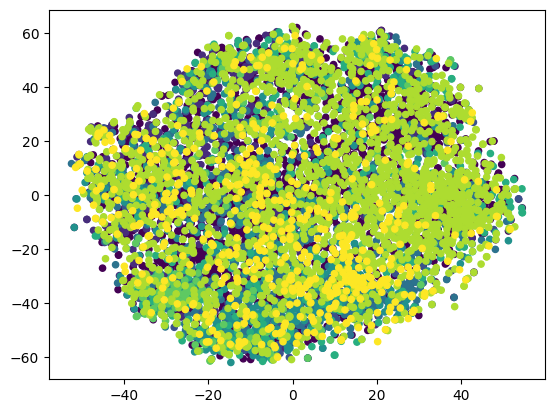

In [2]:
from tsne import tsne
import matplotlib.pyplot as plt

# get the data and labels
X = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values
# run t-SNE
Y = tsne(X, 2, 35, 100.0)
# plot the results
plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
plt.show()

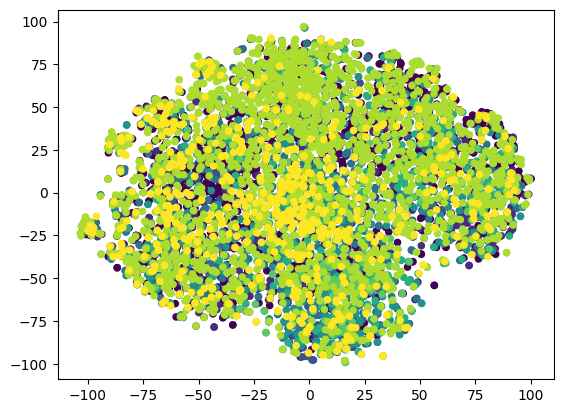

In [17]:
# plot the results
plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
y1 = Y
plt.show()

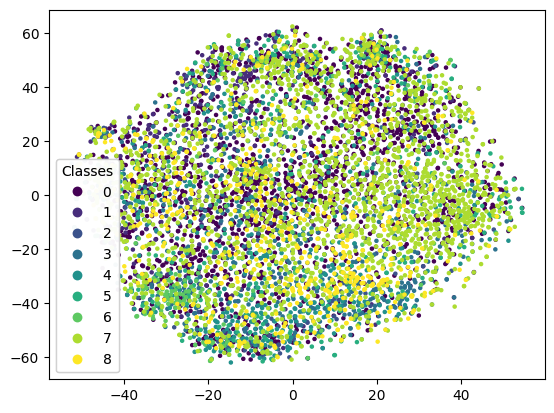

In [11]:
fig, ax = plt.subplots()
scatter = ax.scatter(Y[:, 0], Y[:, 1], 5, labels)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()